In [ ]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
from glob import glob


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/PLD_3_Classes_256/Training'
valid_path = '/content/drive/MyDrive/PLD_3_Classes_256/Validation'
test_path = '/content/drive/MyDrive/PLD_3_Classes_256/Testing'

In [ ]:
conv_base = VGG16(input_shape=(224,244,3),
                        weights='imagenet',
                        include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.trainable = False

In [ ]:
# Summary of the pretrained model
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 61, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 61, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 61, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Define the CNN model
model = Sequential()

model.add(conv_base)
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(264, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())

# Dense layer with 64 units
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())

model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 244),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3281 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 244),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 405 images belonging to 3 classes.


In [ ]:
validation_set = validation_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 244),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 426 images belonging to 3 classes.


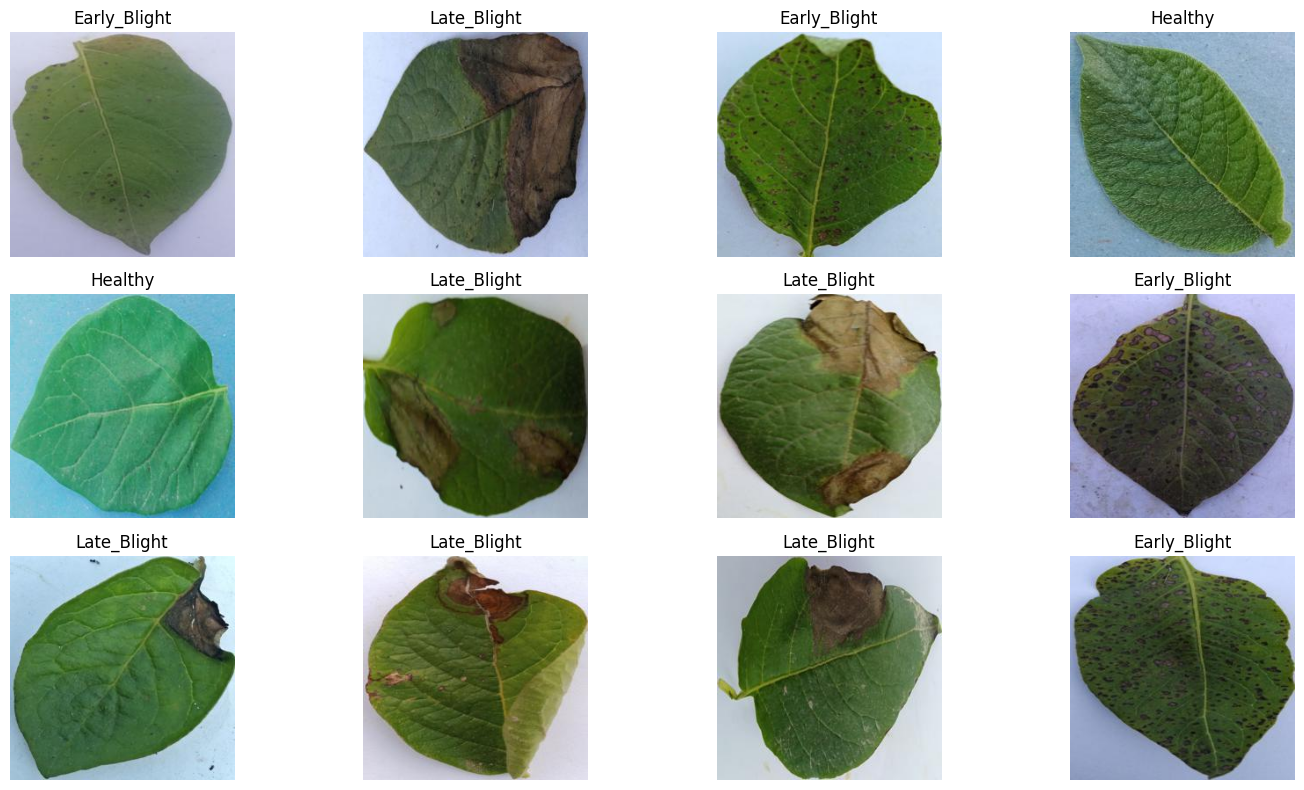

In [ ]:
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf

# Specify the path to your training dataset
dataset_path = '/content/drive/MyDrive/PLD_3_Classes_256/Training'

# Check if the dataset path exists
if not os.path.exists(dataset_path):
    print(f"Dataset path '{dataset_path}' does not exist.")
else:
    # Get all subdirectories (class names)
    class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    # Create a list of all images in the training set
    all_images = []
    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        images = os.listdir(class_path)
        all_images.extend([os.path.join(class_path, img) for img in images])

    # Check if there are enough images
    if len(all_images) < 12:
        print("Not enough images in the dataset.")
    else:
        # Display 12 random images
        num_images = 12
        selected_images = random.sample(all_images, num_images)

        # Set up the plot
        plt.figure(figsize=(15, 8))
        for i, img_path in enumerate(selected_images):
            try:
                # Load the image using TensorFlow's load_img
                img = tf.keras.utils.load_img(img_path)
                img_array = tf.keras.utils.img_to_array(img) / 255.0  # Normalize the image

                # Plot the image
                plt.subplot(3, 4, i + 1)
                plt.imshow(img_array)
                plt.axis('off')
                plt.title(os.path.basename(os.path.dirname(img_path)))  # Show class name as title
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

        plt.tight_layout()
        plt.show()



In [ ]:
history = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=10,
)

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 947s 8s/step - accuracy: 0.6088 - loss: 0.9334 - val_accuracy: 0.6831 - val_loss: 0.7520
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 56s 515ms/step - accuracy: 0.7974 - loss: 0.5061 - val_accuracy: 0.7887 - val_loss: 0.5810
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 83s 529ms/step - accuracy: 0.8449 - loss: 0.3828 - val_accuracy: 0.8310 - val_loss: 0.4599
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 57s 525ms/step - accuracy: 0.8497 - loss: 0.3823 - val_accuracy: 0.8615 - val_loss: 0.3291
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 84s 544ms/step - accuracy: 0.8977 - loss: 0.2792 - val_accuracy: 0.8685 - val_loss: 0.2926
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 80s 530ms/step - accuracy: 0.8780 - loss: 0.3150 - val_accuracy: 0.9108 - val_loss: 0.2546
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 58s 526ms/step - accuracy: 0.9008 - loss: 0.2918 - val_accuracy: 0.9014 - val_loss: 0.2453
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 527ms/step - accuracy: 0.9072 - loss: 0.2

In [ ]:

# Evaluate the model
loss, accuracy = model.evaluate(validation_set)
print('Test accuracy:', accuracy)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9055 - loss: 0.2573
Test accuracy: 0.9037558436393738


In [ ]:
pred = model.predict(validation_set)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


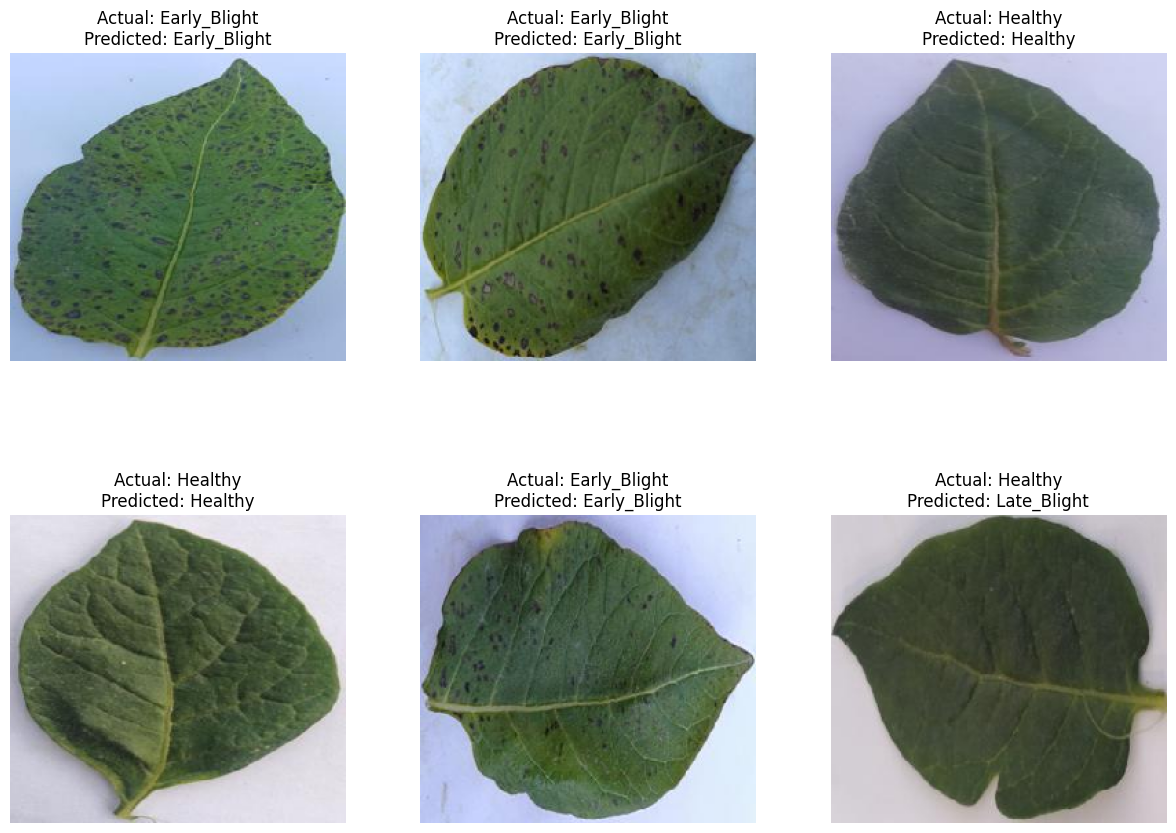

In [ ]:
# Set number of images to display
num_images_to_display = 12

# Get the class names from the generator
classes = list(training_set.class_indices.keys())

# Plot the images with their actual and predicted labels
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        # Extract image and label
        img, label = validation_set[i]

        image = img[0]

        # Display the image
        ax.imshow(image)

        # Get actual and predicted labels
        actual_label = classes[np.argmax(label[0])]
        predicted_label = classes[np.argmax(model.predict(np.expand_dims(image, axis=0)))]

        # Set title with actual and predicted labels
        ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        ax.axis('off')


In [ ]:
model.save('/content/drive/MyDrive/models/deepspudfinal.h5')

In [ ]:
model.save('/content/drive/MyDrive/models/deepspudfinal.keras')

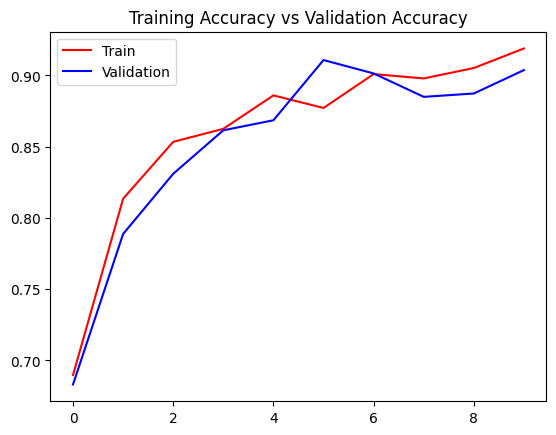

In [ ]:
# Plotting the graph of Accuracy and Validation Accuracy
plt.title('Training Accuracy vs Validation Accuracy')

plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='blue',label='Validation')

plt.legend()


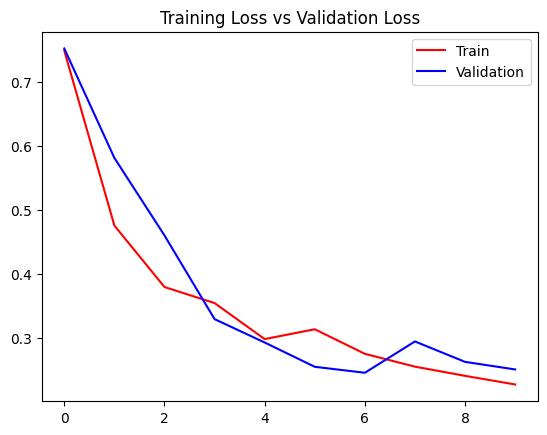

In [ ]:
# Plotting the graph of Accuracy and Validation loss
plt.title('Training Loss vs Validation Loss')

plt.plot(history.history['loss'], color='red',label='Train')
plt.plot(history.history['val_loss'], color='blue',label='Validation')

plt.legend()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/models/deepspudfinal.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
test_path='/content/drive/MyDrive/PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_101.jpg'
img = image.load_img(test_path, target_size=(224, 244))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
predictions = model.predict(img_data)
predicted_classes = predictions.argmax(axis=-1)
classes = ['Early Blight', 'Healthy', 'Late Blight']
predicted_labels = [classes[i] for i in predicted_classes]
print(predictions)
print(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0. 1. 0.]]
['Healthy']
